<b><font size=20, color='#A020F0'>3D plotting

Wenyuan Du <br>
11/28/2022

#### <span style="color:green">Learning Goals</span>
By the end of this notebook you will
1. Use functions in Matplotlib to draw 3D-plots in both cartisian corrdinate.
2. Use functions to change the viewpoint position in the plot.  


<indent>This is another part of the <font color="Royal blue"><b>Matplotlib</b></font> module 

In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import scipy.integrate as si
from matplotlib import cm

Building a 3d space actually only requires the pyplot in <font color='blue'> Matplotlib </font>

Text(0.5, 0, 'Z Axis')

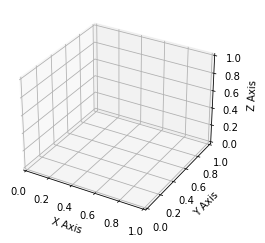

In [3]:
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis") 

We can draw a line in the 3-D space

For easier recognition:

$X=\frac{\cos(\theta)\theta}{4\pi}$\
$Y=\frac{\sin(\theta)\theta}{4\pi}$\
$Z=\cos(\frac{\theta}{20})$

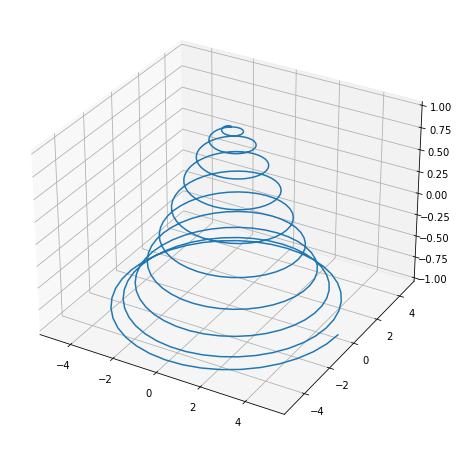

In [24]:
theta = np.linspace(0 * np.pi, 20 * np.pi, 400)
X = np.cos(theta)*theta/(4*np.pi)
Y = np.sin(theta)*theta/(4*np.pi)
Z = np.cos(theta/20)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Y, Z)


We can also plot surfaces, not just lines, in a 3d space.

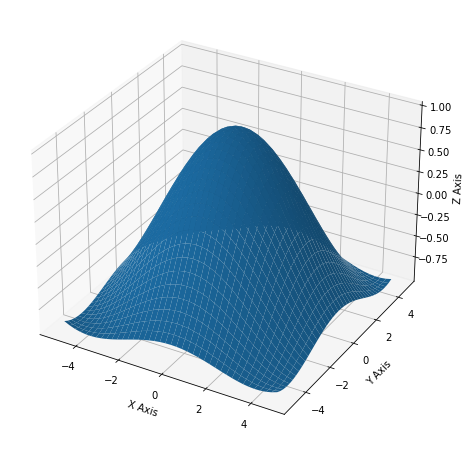

In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
#Setting up x&y extent
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)

#The main function
Z = np.cos(R/2)

#Labels
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.plot_surface(X, Y, Z)

As we have done for the regular 2d plot, we can add color on 3d plots, and the variation of color is depends on <b>z-axis values</b>

Text(0.5, 0, 'Z Axis')

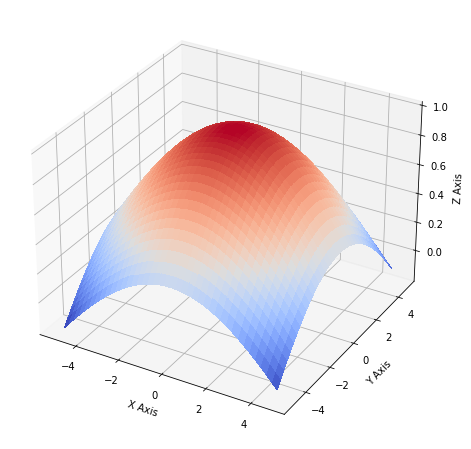

In [51]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
#Changed function
Z = np.cos(R/4) #Was Z = np.cos(R/2)
ax.plot_surface(X, Y, Z,  cmap=cm.coolwarm,  #Color depends on Z
               antialiased=False) #making the surface opaque

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

We can also make projections on planes.
 <blockquote> <b>Note</b>: The offest value should be set as the (min/max) of the axis that unrelated with the projected plane.

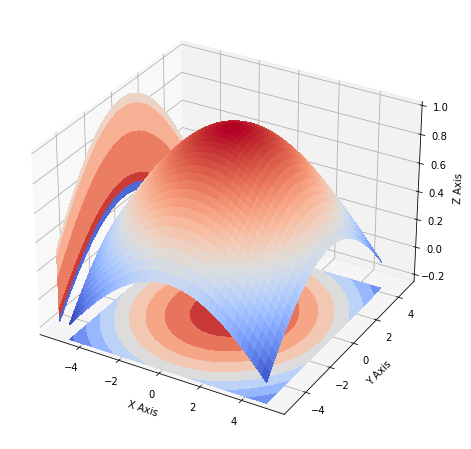

In [54]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z,  cmap=cm.coolwarm,  #Color depends on Z
               antialiased=False) #making the surface opaque
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

#We can also project the 3d plot in to one dimension!
ax.contourf(X, Y, Z, zdir='x', offset=-5.5, cmap='coolwarm') #Notice the offest value!
ax.contourf(X, Y, Z, zdir='z', offset=-0.3, cmap='coolwarm') #Notice the offest value!

Another amazing part of 3-D plotting in matplotlib is that we can change the direction and focus of our view.
<blockquote>Projection (2 types):  persp ( $f\in[0,\infty)$ ) and ortho ( $f=\infty$ )
    
Direction (3 parameters):  elev (elevation), azim (azimuth), and vertical_axis (Vertical axes).

<img src='explain.gif' width='600' height='600'/>

Text(0.5, 0.92, "elev=45, azim=45, vertical_axis='z', proj=ortho")

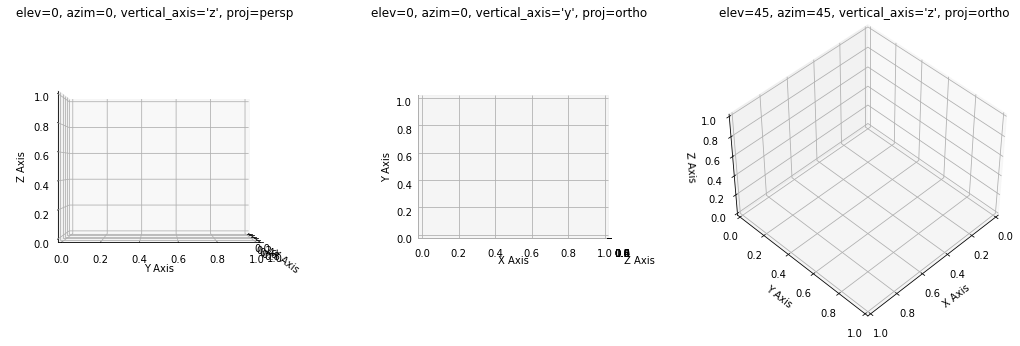

In [66]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(131, projection='3d')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_proj_type("persp")
ax.view_init(elev=0, azim=0, vertical_axis='z')
ax.set_title("elev=0, azim=0, vertical_axis='z', proj=persp")

bx = fig.add_subplot(132, projection='3d')
bx.set_xlabel("X Axis")
bx.set_ylabel("Y Axis")
bx.set_zlabel("Z Axis")
bx.set_proj_type("ortho")
bx.view_init(elev=0, azim=0, vertical_axis='y')
bx.set_title("elev=0, azim=0, vertical_axis='y', proj=ortho")

cx = fig.add_subplot(133, projection='3d')
cx.set_xlabel("X Axis")
cx.set_ylabel("Y Axis")
cx.set_zlabel("Z Axis")
#cx.set_proj_type("ortho")
cx.view_init(elev=45, azim=45, vertical_axis='z')
cx.set_title("elev=45, azim=45, vertical_axis='z', proj=ortho")

### A real world example!

(Data from HW3)

In [74]:
import xarray as xr, numpy as np, matplotlib.pyplot as plt, os
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import cartopy.crs as ccrs
#Some basic data processing
root='/tornado/home1/class/fall21/zanowski/HW3_data'
filelist=os.listdir('/tornado/home1/class/fall21/zanowski/HW3_data')
temp=[]
for i in filelist:
    ds1=xr.open_dataset(os.path.join(root,i))
    temp.append(ds1)
ds=xr.merge(temp)
ds

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 360, level: 32, time: 492)
Coordinates:
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * level      (level) int32 10 20 30 50 70 100 125 ... 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Data variables:
    v          (level, latitude, longitude) float32 ...
    u          (level, latitude, longitude) float32 ...
    t          (level, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-29 22:26:09 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
    Description:  ERA5 meridional velocity (v) averaged between 1979 and 2020...

Text(0.5, 1.0, '3D Pressure plot location')

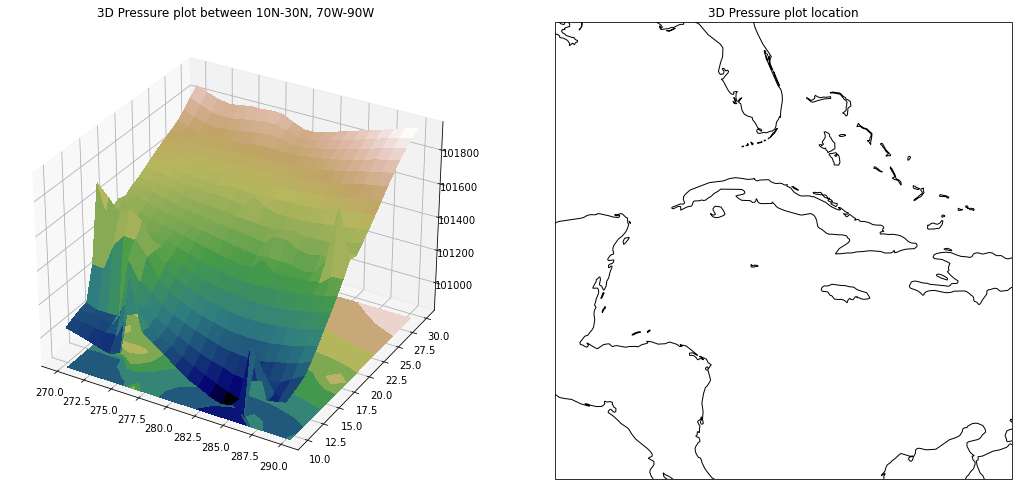

In [83]:
N_atl=ds.msl.sel(latitude=slice(30,10),longitude=slice(360-90,360-70))
z=N_atl.isel(time=-1).values
x_temp=N_atl.longitude.values
y_temp=N_atl.latitude.values
x,y=np.meshgrid(x_temp,y_temp)
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.gist_earth, antialiased=False)
ax.set_title("3D Pressure plot between 10N-30N, 70W-90W") 

#Adding light source can resolve the problem of unable to recognize places with hgiher values and lower values
#ls = LightSource()
#rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
#surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
#                       linewidth=0, antialiased=False, shade=False)

#You can use cartopy to check the place.
ax.contourf(x, y, z, zdir='z', offset=100800, cmap=cm.gist_earth)

ax2=fig.add_subplot(122,projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.set_extent([-90,-70, 30, 10])
ax2.set_title("3D Pressure plot location") 